In [162]:
import pandas as pd
import numpy_financial as np
from datetime import date

In [163]:
interest = 0.03
years = 30
payment_year = 12
mortgage = 500000
start_date = (date(2021, 1, 1))
additional_payment = 0

In [164]:
pmt = -1*np.pmt(interest/12, years*payment_year, mortgage)
ipmt = -1*np.ipmt(interest/payment_year,1,years*payment_year,mortgage)
ppmt = -1*np.ppmt(interest/payment_year,1,years*payment_year,mortgage)
Interest_Contribution = (ipmt/pmt)*100


In [165]:
rng = pd.date_range(start_date, periods=years*payment_year, freq='MS')
rng.name = "Payment Date"

df= pd.DataFrame(index = rng, columns = ['Payment', 'Principal Paid', 'Interest Paid', 'Interest Contribution', 'Ending Balance'], dtype='float')
df.reset_index(inplace=True)
df.index +=1
df.index.name = "Period"
df

,Payment Date,Payment,Principal Paid,Interest Paid,Interest Contribution,Ending Balance
Period,,,,,,
1,2021-01-01,NaN,NaN,NaN,NaN,NaN
2,2021-02-01,NaN,NaN,NaN,NaN,NaN
3,2021-03-01,NaN,NaN,NaN,NaN,NaN
4,2021-04-01,NaN,NaN,NaN,NaN,NaN
5,2021-05-01,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
356,2050-08-01,NaN,NaN,NaN,NaN,NaN
357,2050-09-01,NaN,NaN,NaN,NaN,NaN
358,2050-10-01,NaN,NaN,NaN,NaN,NaN


In [166]:
df["Payment"] = -1*np.pmt(interest/12, years*payment_year, mortgage) + additional_payment
df["Interest Paid"]=-1*np.ipmt(interest/payment_year,df.index,years*payment_year,mortgage)
df["Principal Paid"]= (-1*np.pmt(interest/12, years*payment_year, mortgage) + additional_payment) - (-1*np.ipmt(interest/payment_year,df.index,years*payment_year,mortgage))
df["Interest Contribution"] = (-1*np.ipmt(interest/payment_year,df.index,years*payment_year,mortgage))/(-1*np.pmt(interest/12, years*payment_year, mortgage) + additional_payment)*100
df["Ending Balance"] = 0
df.loc[1, "Ending Balance"] = mortgage - df.loc[1, "Principal Paid"]
df = df.round(2)
df

,Payment Date,Payment,Principal Paid,Interest Paid,Interest Contribution,Ending Balance
Period,,,,,,
1,2021-01-01,2108.02,858.02,1250.00,59.30,499141.98
2,2021-02-01,2108.02,860.17,1247.85,59.20,0.00
3,2021-03-01,2108.02,862.32,1245.70,59.09,0.00
4,2021-04-01,2108.02,864.47,1243.55,58.99,0.00
5,2021-05-01,2108.02,866.63,1241.39,58.89,0.00
...,...,...,...,...,...,...
356,2050-08-01,2108.02,2081.87,26.15,1.24,0.00
357,2050-09-01,2108.02,2087.07,20.95,0.99,0.00
358,2050-10-01,2108.02,2092.29,15.73,0.75,0.00


In [167]:
for period in range (2,len(df)+1):
    previous_balance = df.loc[period-1,'Ending Balance']
    principal_paid = df.loc[period,"Principal Paid"]

    if previous_balance == 0:
        df.loc[period, ['Payment', 'Principal Paid', 'Interest Paid', 'Interest Contribution', 'Ending Balance']] =0
        continue
    elif principal_paid<=previous_balance:
        df.loc[period, 'Ending Balance'] = previous_balance - principal_paid

In [168]:
df

,Payment Date,Payment,Principal Paid,Interest Paid,Interest Contribution,Ending Balance
Period,,,,,,
1,2021-01-01,2108.02,858.02,1250.00,59.30,499141.98
2,2021-02-01,2108.02,860.17,1247.85,59.20,498281.81
3,2021-03-01,2108.02,862.32,1245.70,59.09,497419.49
4,2021-04-01,2108.02,864.47,1243.55,58.99,496555.02
5,2021-05-01,2108.02,866.63,1241.39,58.89,495688.39
...,...,...,...,...,...,...
356,2050-08-01,2108.02,2081.87,26.15,1.24,8379.63
357,2050-09-01,2108.02,2087.07,20.95,0.99,6292.56
358,2050-10-01,2108.02,2092.29,15.73,0.75,4200.27


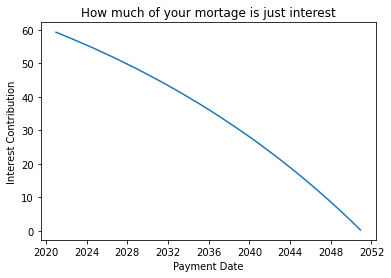

In [169]:
import matplotlib.pyplot as plt

plt.plot(rng,(-1*np.ipmt(interest/payment_year,df.index,years*payment_year,mortgage))/(-1*np.pmt(interest/12, years*payment_year, mortgage) + additional_payment)*100)
plt.title('How much of your mortage is just interest')
plt.xlabel('Payment Date')
plt.ylabel('Interest Contribution')
plt.show()

In [ ]:
#Done